## Baseline classification experiments for catinous

In [1]:
from pytorch_lightning import Trainer
from catinous.CatsinomModel import CatsinomModel
from catinous.CatsinomDataset import CatsinomDataset
import matplotlib.pyplot as plt
from pytorch_lightning.callbacks import ModelCheckpoint
from torch.utils.data import DataLoader
import os
import torchvision.models as models
import torch.nn as nn
import torch
import torch.nn.functional as F
import visualizationutils as vu
import argparse
import pytorch_lightning as pl

In [8]:
hparams = dict() #TODO: this shouldn't be like that
hparams['root_dir'] = '/project/catinous/cat_data_harder/'
hparams['datasetfile'] = 'catsinom_combined_harder_dataset.csv'
hparams['batch_size'] = 8
model = CatsinomModel(argparse.Namespace(**hparams))

In [9]:
logger = pl.logging.TestTubeLogger("catinous_log", name="harder_combined")
trainer = Trainer(gpus=1, max_nb_epochs=5, early_stop_callback=False, logger=logger)
trainer.fit(model)

Validation sanity check:   0%|          | 0/5 [00:00<?, ?batch/s]

/project/catinous/cat_data_harder/ catsinom_combined_harder_dataset.csv


Epoch 5: 100%|██████████| 803/803 [03:22<00:00,  3.96batch/s, batch_nb=701, gpu=0, loss=0.244, v_nb=0]


1

# Loading test sets

In [2]:
test_lr = DataLoader(CatsinomDataset('/project/catinous/cat_data_harder/', 'catsinom_lr_harder_dataset.csv', split='test'), batch_size=8, num_workers=4)
test_hr = DataLoader(CatsinomDataset('/project/catinous/cat_data_harder/', 'catsinom_hr_harder_dataset.csv', split='test'), batch_size=8, num_workers=4)
device = torch.device('cuda')

## Testing LR model

In [4]:
model = CatsinomModel.load_from_checkpoint('/project/catinous/trained_models/baseline_harder_lr.ckpt')
model.to(device)
model.freeze()

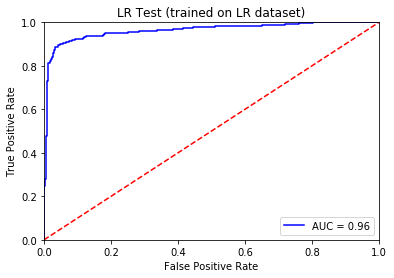

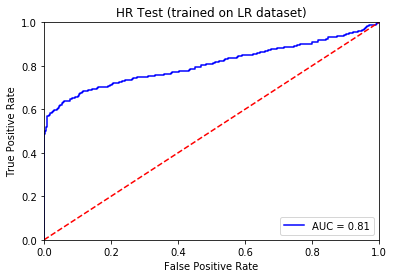

In [5]:
out_proba = []
true = []
for data in test_lr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='LR Test (trained on LR dataset)')

out_proba = []
true = []
for data in test_hr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='HR Test (trained on LR dataset)')

## Testing HR Model

In [6]:
model = CatsinomModel.load_from_checkpoint('/project/catinous/trained_models/baseline_harder_hr.ckpt')
model.to(device)
model.freeze()

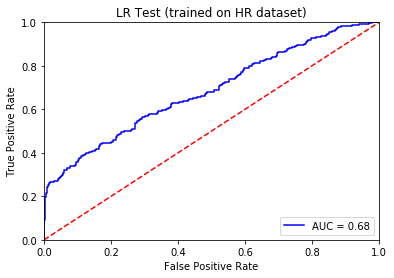

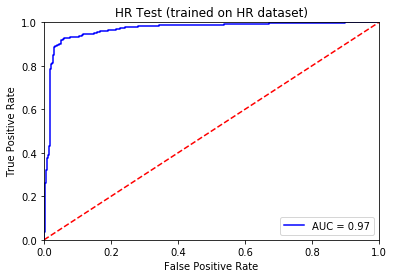

In [7]:
out_proba = []
true = []
for data in test_lr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='LR Test (trained on HR dataset)')

out_proba = []
true = []
for data in test_hr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='HR Test (trained on HR dataset)')

## Testing combined model

In [4]:
model = CatsinomModel.load_from_checkpoint('/project/catinous/trained_models/baseline_harder_combined.ckpt')
model.to(device)
model.freeze()

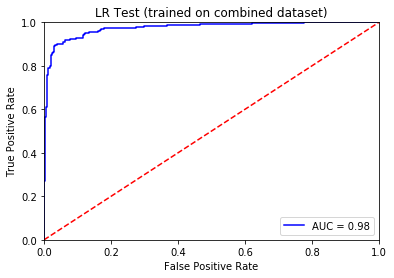

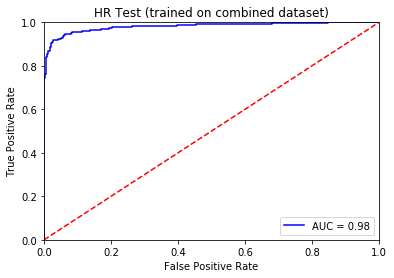

In [5]:
out_proba = []
true = []
for data in test_lr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='LR Test (trained on combined dataset)')

out_proba = []
true = []
for data in test_hr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='HR Test (trained on combined dataset)')

## Loading lr checkpoint, train hr

In [6]:
hparams = dict() #TODO: this shouldn't be like that
hparams['root_dir'] = '/project/catinous/cat_data_harder/'
hparams['datasetfile'] = 'catsinom_hr_harder_dataset.csv'
hparams['batch_size'] = 8
model = CatsinomModel(argparse.Namespace(**hparams))
checkpoint = torch.load('/project/catinous/trained_models/baseline_harder_lr.ckpt')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [7]:
logger = pl.logging.TestTubeLogger("catinous_log", name="harder_hr_on_lr")
trainer = Trainer(gpus=1, max_nb_epochs=5, early_stop_callback=False, logger=logger)
trainer.fit(model)

Validation sanity check:   0%|          | 0/5 [00:00<?, ?batch/s]

/project/catinous/cat_data_harder/ catsinom_hr_harder_dataset.csv


Epoch 5: 100%|██████████| 424/424 [01:52<00:00,  3.78batch/s, batch_nb=370, gpu=0, loss=0.133, v_nb=0]


1

In [3]:
model = CatsinomModel.load_from_checkpoint('/project/catinous/trained_models/baseline_harder_lrhr.ckpt')
model.to(device)
model.freeze()

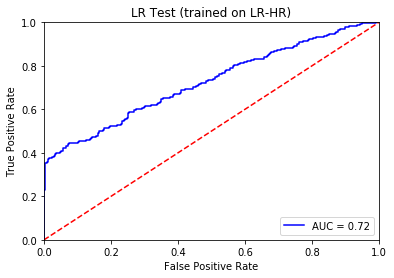

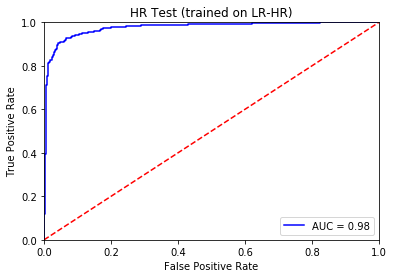

In [4]:
out_proba = []
true = []
for data in test_lr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='LR Test (trained on LR-HR)')

out_proba = []
true = []
for data in test_hr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='HR Test (trained on LR-HR)')

## Loading hr checkpoint, train lr

In [5]:
hparams = dict() #TODO: this shouldn't be like that
hparams['root_dir'] = '/project/catinous/cat_data_harder/'
hparams['datasetfile'] = 'catsinom_lr_harder_dataset.csv'
hparams['batch_size'] = 8
model = CatsinomModel(argparse.Namespace(**hparams))
checkpoint = torch.load('/project/catinous/trained_models/baseline_harder_hr.ckpt')
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [6]:
logger = pl.logging.TestTubeLogger("catinous_log", name="harder_lr_on_hr")
trainer = Trainer(gpus=1, max_nb_epochs=5, early_stop_callback=False, logger=logger)
trainer.fit(model)

Validation sanity check:   0%|          | 0/5 [00:00<?, ?batch/s]

/project/catinous/cat_data_harder/ catsinom_lr_harder_dataset.csv


Epoch 5: 100%|██████████| 379/379 [01:34<00:00,  4.01batch/s, batch_nb=330, gpu=0, loss=0.193, v_nb=0]


1

In [3]:
model = CatsinomModel.load_from_checkpoint('/project/catinous/trained_models/baseline_harder_hrlr.ckpt')
model.to(device)
model.freeze()

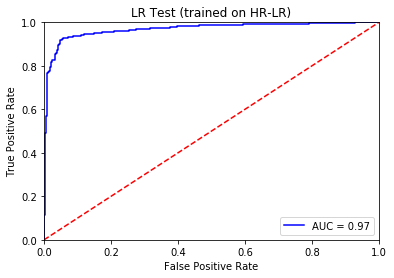

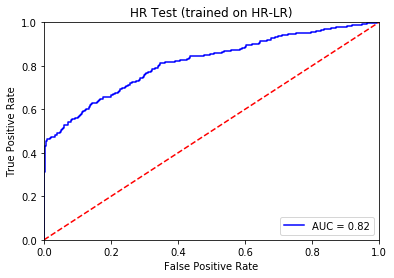

In [4]:
out_proba = []
true = []
for data in test_lr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='LR Test (trained on HR-LR)')

out_proba = []
true = []
for data in test_hr:
    x, y, img = data
    x = x.float().to(device)
    y_out = model.forward(x)
    y_out = torch.sigmoid(y_out)
    
    true.extend(y.cpu().numpy())
    out_proba.extend([o[0] for o in y_out.cpu().numpy()])
vu.plot_roc_curve(true, out_proba, title='HR Test (trained on HR-LR)')